## Review

The [softmax function](https://en.wikipedia.org/wiki/Softmax_function) is a way to transform a vector of real numbers $r$ into a probability vector $\sigma(r)$ while preserving the monotonicity of the coordinates:

$$
\sigma(r)_i \equiv \frac{\exp(r_i)}{\sum_j \exp(r_j)}.
$$

In [2]:
%load_ext lab_black

In [97]:
from numpy import ndarray as NDArray
from numpy.typing import ArrayLike
import numpy as np


def softmax(r: ArrayLike) -> NDArray:
    """Computes the softmax of the input.

    If the input is a tensor, the sum is reduced along the first axis.
    """
    exp_r = np.exp(r)
    return exp_r / exp_r.sum(axis=0)

An application of the softmax is in training [neural](https://en.wikipedia.org/wiki/Neural_network) [multiclass classification](https://en.wikipedia.org/wiki/Multiclass_classification) with classes $i = 1, 2, \ldots, k$.
In this case, we have a neural network $x \mapsto f(x)$ which transforms a feature vector $x$ into a real-valued vector $f(x)$ with one coordinate for each of the $k$ classes.
The predicted class is the coordinate of $f(x)$ with the maximum value.
Training such a network is typically achieved by minimizing the [cross entropy](https://en.wikipedia.org/wiki/Cross_entropy):

$$
\sum_{(x, i)} -\log \sigma(f(x))_i
$$

where the sum is taken over feature-class pairs $(x, i)$ in the training set.

## Temperature

Consider the softmax of the vector $r = (1, 2, 3)$:

In [117]:
r = np.array([1.0, 2.0, 3.0])
softmax(r)

array([0.09003057, 0.24472847, 0.66524096])

We see that a majority of the probability mass is assigned to the last coordinate.
What if this is undesirable?
Let's examine what happens if we *attenuate* the vector before applying the softmax...

In [115]:
softmax(r / 10.0)

array([0.30060961, 0.33222499, 0.3671654 ])

Note, that while the monotonicity is preserved, the probabilities tend to a uniform distribution.
Conversely, if we *amplify* $r$ before applying the softmax, the probabilities tend towards an atom which places all of the mass on the largest coordinate:

In [114]:
softmax(r * 10.0)

array([2.06106005e-09, 4.53978686e-05, 9.99954600e-01])

In general, we define

$$
\sigma_T(r) \equiv \sigma(r / T)
$$

as the *softmax with temperature $T$*.
Here, $T$ is a scalar that, just as above, controls the clustering of probabilities.

This behavior is more clearly demonstrated in the plot below, where the softmax is computed for many values of the temperature:

In [164]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.style.use("fivethirtyeight")


def plot_softmax_vs_temp(x, T_min=0.1, T_max=1000):
    x = np.array(x)
    T = np.logspace(np.log10(T_min), np.log10(T_max))
    s = softmax(x[:, np.newaxis] / T[np.newaxis])
    x_str = ", ".join(f"{xi:g}" for xi in x)
    for i, (si, xi) in enumerate(zip(s, x)):
        label = f"$\sigma_T(r)_{i + 1}$"
        linestyle = "--" if np.any(x[:i] == xi) else "-"
        plt.semilogx(T, si, label=label, linestyle=linestyle)
    plt.legend()
    plt.xlabel("Temperature $T$")
    plt.ylabel("Probability")
    plt.title(f"Softmax of $r=({x_str})$ vs. Temperature")

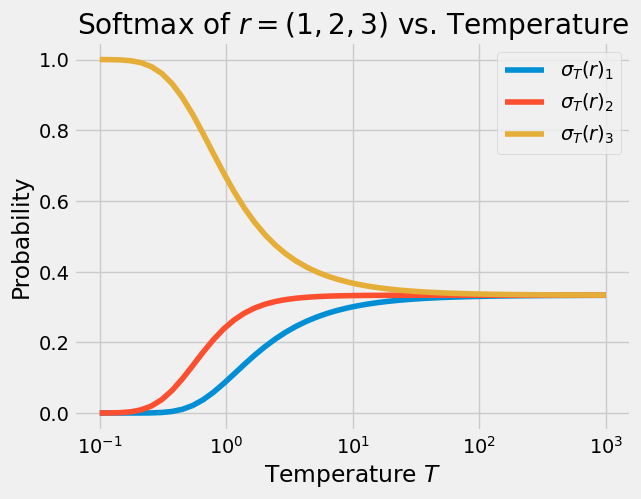

In [165]:
plot_softmax_vs_temp([1.0, 2.0, 3.0])

In the plot above, we can see the limiting behavior as $T \rightarrow 0$ is to place all of the mass on the atom corresponding to the largest coordinate of $r$.
However, when there is no single largest coordinate, the limiting behavior is to evenly split the probability mass among the largest coordinates:

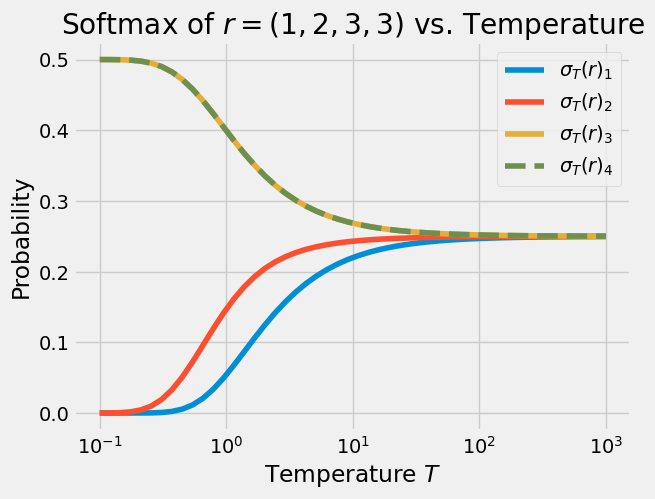

In [166]:
plot_softmax_vs_temp([1.0, 2.0, 3.0, 3.0])

We can state our findings above rigorously.
For brevity, define $\sigma_0(r) \equiv \lim_{T \rightarrow 0} \sigma_T(r)$ and $\sigma_\infty$ similarly.
Let $e = (1, \ldots, 1)^\intercal$ be the ones vector.

**Proposition.**
Let $r$ be a vector in $\mathbb{R}^k$.
Let $m_i$ be equal to one if $r_i = \max_j r_j$ and zero otherwise.
Then,

$$
\sigma_0(r) = \frac{m}{e^\intercal m}
$$

*Proof*.
Let $\overline{r} \equiv \max_j r_j$.
Fix $i$.
If $r_i < \overline{r}$, then

$$
\sigma_{T}(r)_i
\leq \frac{\exp(r_i / T)}{\exp(\overline{r} / T)}
= \exp((r_i - \overline{r}) / T)
$$

which tends to zero as $T$ vanishes.
Therefore, the only nonzero coordinates $i$ of $\sigma_0(r)$ are those satisfying $r_i = \overline{r}$.
Since all such coordinates must be equal, the desired result follows from the fact that $\sigma_0(r)$ is a probability vector.

**Proposition.**
Let $r$ be a vector in $\mathbb{R}^k$.
Then,

$$
\sigma_\infty(r) = \frac{e}{k}.
$$

*Proof*.
This follows immediately from $\lim_{T \rightarrow \infty} \exp(r_i / T) = 1$.